# Task 1

In [325]:
import numpy as np
import pandas as pd
from pandas import DataFrame

#Now, we will store our data from CURE3data.xlsx in df DataFrame

df = DataFrame()
df = pd.read_excel(r"C:\Users\rumai\OneDrive\Documents\ENDG319\CURE3data.xlsx")
df;

For the codes below:

In the first line, we dropped the columns City, Year and Month as these were not attributes. From CURE Deliverable 3, we found out that the machine learning model will be able to classify a new instance since there are clear trends in our data after analysis. Our scatter plots from figure 2,3 & 4 (Average Household heating fuel vs Average Price of Diesel, Average Household heating fuel vs Average Price of Gasoline, Average Price of Diesel vs Average Price of Gasoline) reveal that there is a clear and distinguishable positive correlation between the respective attributes for both cities.
Therefore, dfX contains these three attributes.

In the second line, sy contains the class, which is 'City'.

In [326]:
dfX = df.drop (columns =['City', 'Year', 'Month'])
sy = df.City

Next, we will split the dfX and sy DataFrames into training sets and test sets.

In [327]:
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX,sy)

dfX_train, dfX_test, sy_train, sy_test;

In [328]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le

LabelEncoder()

In [329]:
le = le.fit(sy_train)
le.classes_

array(['Toronto', 'Vancouver'], dtype=object)

In [330]:
y_train = le.transform(sy_train)  #Transforms the labels into numbers
sy_train, y_train;

In [331]:
n1 = preprocessing.MinMaxScaler()    #Defines the preprocessing tool
n1=n1.fit(dfX_train.to_numpy())      #Fits the normalizer with attribute DataFrame

X_train = n1.transform(dfX_train.to_numpy())    #Applied to transform the attribute DataFrame into an array X with normalized values
X_train;

In [332]:
X_train.shape

(76, 3)

In [333]:
from sklearn.neighbors import KNeighborsClassifier   #Import the classifier KNeighborsClassifier from 'neighbors' module
knn = KNeighborsClassifier(n_neighbors = 2)       #Defines the knn classifier, where k=2
knn = knn.fit(X_train,y_train)                    #Fits the classifier according to the training sets of data
knn;

In [334]:
#Converting dfX_test and sy_test into arrays X_test and y_test
y_test = le.transform(sy_test.to_numpy())
X_test = n1.transform(dfX_test.to_numpy())

sy_test, y_test, dfX_test, X_test;

In [335]:
knn.predict(X_test)

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1])

In [336]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1])

# Task 2a

In [337]:
knn.score(X_test,y_test)   #Accuracy of the knn classifier

1.0

In [338]:
knn.score(X_train,y_train)

0.9868421052631579

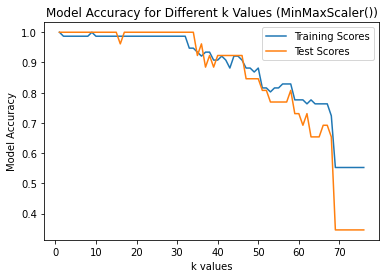

In [339]:
import matplotlib.pyplot as plt
import numpy as np 

m, n = X_train.shape
m, n;

k_array = np.linspace(1, m, m)      #Array of k values from 1 to m as integers

#Arrays of scores at different k values
score_train = np.array([])
score_test = np.array([])

for k in k_array:       #Using a for loop to generate plots for various k-values
    
    knn = KNeighborsClassifier(n_neighbors = int(k))       #Produces a knn classifier model using each k value
    knn = knn.fit(X_train, y_train)                        #Fits the accuracy score in the array of scores
    k_score_train = knn.score(X_train, y_train)
    k_score_test = knn.score(X_test, y_test)
    score_train = np.append(score_train, k_score_train)
    score_test = np.append(score_test, k_score_test)
    
plt.plot(k_array, score_train)
plt.plot(k_array, score_test)
plt.title("Model Accuracy for Different k Values (MinMaxScaler())")
plt.xlabel("k values")
plt.ylabel("Model Accuracy")
plt.legend(["Training Scores", "Test Scores"])
plt.show()

# Task 2b

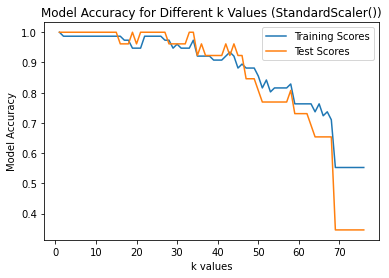

In [340]:
stand = preprocessing.StandardScaler()
standfitted = stand.fit(dfX_train.to_numpy())
X_train_2 = standfitted.transform(dfX_train.to_numpy())
X_test_2 = standfitted.transform(dfX_test.to_numpy())

score_train2 = np.array([]) 
score_test2 = np.array([])

for k in k_array:          #Using a for loop to generate plots for various k-values
    
    knn = KNeighborsClassifier(n_neighbors = int(k))              #Produces a knn classifier model using each k value
    knn = knn.fit(X_train_2, y_train)                             #Fits the accuracy score in the array of scores
    k_score_train2 = knn.score(X_train_2, y_train)
    score_train2 = np.append(score_train2, k_score_train2)
    k_score_test2 = knn.score(X_test_2, y_test)
    score_test2 = np.append(score_test2, k_score_test2)
    
plt.plot(k_array, score_train2)
plt.plot(k_array, score_test2)
plt.title("Model Accuracy for Different k Values (StandardScaler())")
plt.xlabel("k values")
plt.ylabel("Model Accuracy")
plt.legend(["Training Scores", "Test Scores"])
plt.show()

# Task 3a

The best value of k taken is k=2, as the accuracy score is the highest when the program is run.

The best scaler is MinMaxScaler(), as it shows the higher values of accuracy at more values of k.

# Task 3b

In [341]:
KNN = KNeighborsClassifier(n_neighbors = 2)
KNN = KNN.fit(X_train, y_train) 
KNN.score(X_train, y_train), KNN.score(X_test, y_test)

(0.9868421052631579, 1.0)

[[17  0]
 [ 0  9]]


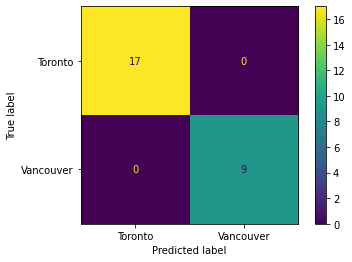

In [342]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lefitted = le.fit(sy_train)
lefitted.classes_
y_train = lefitted.transform(sy_train)
y_test = lefitted.transform(sy_test.to_numpy())
predictions = KNN.predict(X_test)
c_m = confusion_matrix(y_test, predictions)
print(c_m)
ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels = lefitted.classes_).plot()

In [343]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1])

In [344]:
predictions

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1])

# Task 4

In [345]:
new_instances = np.array([[115.1, 108.7, 91]])
new_a = n1.transform(new_instances)
                                              
new_a

array([[0.57481752, 0.39341693, 0.1323693 ]])

In [346]:
lefitted.inverse_transform(KNN.predict(new_a))

array(['Toronto'], dtype=object)

The predicted class is the same as the class from which the instances were taken.